**Тема “Обучение без учителя”**

**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [3]:
X = pd.DataFrame(data=boston_data['data'], columns=boston_data['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = pd.DataFrame(boston_data['target'], columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f'До:\t{X_train_scaled.shape}\nПосле:\t{X_train_tsne.shape}')

До:	(404, 13)
После:	(404, 2)


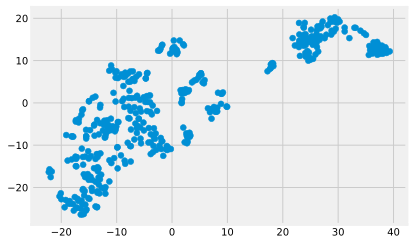

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [9]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans

KMeans(max_iter=100, n_clusters=3, random_state=42)

In [10]:
train_labels = kmeans.fit_predict(X_train_scaled)
train_labels

array([1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0,
       2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2,
       1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2,
       1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1,
       1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2,
       2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0,
       1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0,

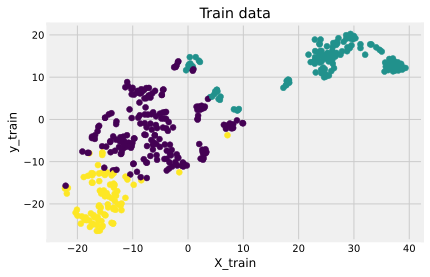

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Train data')
plt.show()

In [12]:
price_cluster_0 = y_train[train_labels == 0].mean()
price_cluster_1 = y_train[train_labels == 1].mean()
price_cluster_2 = y_train[train_labels == 2].mean()

crim_cluster_0 = X_train['CRIM'][train_labels == 0].mean()
crim_cluster_1 = X_train['CRIM'][train_labels == 1].mean()
crim_cluster_2 = X_train['CRIM'][train_labels == 2].mean()

In [13]:
print(f'Price:\nКластер 0\t{price_cluster_0[0]}\nКластер 1\t{price_cluster_1[0]}\nКластер 2\t{price_cluster_2[0]}\n')
print(f'CRIM:\nКластер 0\t{crim_cluster_0}\nКластер 1\t{crim_cluster_1}\nКластер 2\t{crim_cluster_2}')

Price:
Кластер 0	24.958115183246072
Кластер 1	16.165354330708663
Кластер 2	27.78837209302326

CRIM:
Кластер 0	0.4216602094240837
Кластер 1	10.797028425196851
Кластер 2	0.07356558139534884


***Задание 3**

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [14]:
test_labels = kmeans.predict(X_test_scaled)
test_labels

array([0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int32)

In [15]:
price_test_0 = y_test[test_labels == 0].mean()
price_test_1 = y_test[test_labels == 1].mean()
price_test_2 = y_test[test_labels == 2].mean()

crim_test_0 = X_test['CRIM'][test_labels == 0].mean()
crim_test_1 = X_test['CRIM'][test_labels == 1].mean()
crim_test_2 = X_test['CRIM'][test_labels == 2].mean()

In [16]:
print(f'Price:\nКластер 0\t{price_test_0[0]}\nКластер 1\t{price_test_1[0]}\nКластер 2\t{price_test_2[0]}\n')
print(f'CRIM:\nКластер 0\t{crim_test_0}\nКластер 1\t{crim_test_1}\nКластер 2\t{crim_test_2}')

Price:
Кластер 0	21.860784313725492
Кластер 1	16.43714285714286
Кластер 2	31.35

CRIM:
Кластер 0	0.2660788235294118
Кластер 1	10.165531142857143
Кластер 2	0.06206
